In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df_cpt = pd.read_csv('files/cptevents.csv')
df_cpt['CPT_NUMBER'].nunique()

C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2012

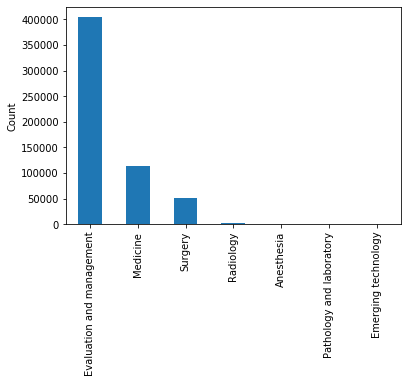

In [17]:
#df_cpt[df_cpt['SUBSECTIONHEADER']=='Evaluation and management']
df_ser = pd.read_csv('files/services.csv')
plt.ylabel('Count')
#plt.title('Distribution of LOS')
df_cpt['SECTIONHEADER'].value_counts().plot(kind="bar")

In [11]:
#df_cat.columns = ['HADM_ID','no_CPT']
hadm_list = df_cpt.groupby('HADM_ID')['SECTIONHEADER'].apply(list).reset_index()
hadm_item = pd.get_dummies(hadm_list['SECTIONHEADER'].apply(pd.Series).stack()).sum(level=0)
df_cat = hadm_item.join(hadm_list['HADM_ID'], how="outer")
df_cat

,Anesthesia,Emerging technology,Evaluation and management,Medicine,Pathology and laboratory,Radiology,Surgery,HADM_ID
0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,100001
1,0.0,0.0,6.0,0.0,0.0,1.0,1.0,100003
2,0.0,0.0,10.0,0.0,0.0,0.0,0.0,100006
3,0.0,0.0,5.0,0.0,0.0,0.0,0.0,100007
4,0.0,0.0,4.0,1.0,0.0,0.0,6.0,100009
...,...,...,...,...,...,...,...,...
44143,0.0,0.0,8.0,15.0,0.0,0.0,0.0,199993
44144,0.0,0.0,3.0,3.0,0.0,0.0,0.0,199994
44145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,199995
44146,0.0,0.0,0.0,1.0,0.0,0.0,0.0,199998


In [12]:
#df_cat['CPT_evaluation&management'] = df_group['SECTIONHEADER'].transform(lambda x: sum(x=='Evaluation and management'))
#df_cat['CPT_surgery'] = df_group['SECTIONHEADER'].transform(lambda x: sum(x=='Surgery'))
#df_cat['CPT_radiology'] = df_group['SECTIONHEADER'].transform(lambda x: sum(x=='Radiology'))
#df_cat['CPT_anesthesia'] = df_group['SECTIONHEADER'].transform(lambda x: sum(x=='Anesthesia'))
#df_cat['CPT_emergingtechnology'] = df_group['SECTIONHEADER'].transform(lambda x: sum(x=='Emerging technology'))
#df_cat['CPT_pathology&laboratory'] = df_group['SECTIONHEADER'].transform(lambda x: sum(x=='Pathology and laboratory'))
#df_cat['CPT_medicine'] = df_group['SECTIONHEADER'].transform(lambda x: sum(x=='Medicine'))
#df_cat.to_csv('merge_CPT.csv',index=False)
#df_cat.head(50)

In [13]:
df = pd.read_csv('merge_diag_pat_proc_icu.csv')
df = df.merge(df_cat, how='outer', on='HADM_ID')


In [14]:
df.to_csv('merge_diag_pat_proc_icu_cpt.csv',index=False)